In [54]:
import pandas as pd
# import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("./modules/") # for d3plus2

sys.path.append("./../Hidalgo_Haussmann") # for HH tools
# from HH_tools import *

import d3plus2 as d3plus

import numpy as np

# import geopandas as gpd

In [55]:
path = './data/disagg_struct_refs/sources/US/'
agglevel_titles = pd.read_csv(path+'agglevel_titles.csv')
area_titles = pd.read_csv(path+'area_titles.csv')
# industry_titles = pd.read_csv(path+'industry_titles.csv')



In [56]:
# df_cnt = df.loc[df.agglvl_code == 76]
# df_msa = df.loc[df.agglvl_code == 46]
df_cnt = pd.read_csv('./data/naics_area_cnt_02_07.csv', index_col=[0, 1])
# df_msa = pd.read_csv('./data/naics_area_msa_02_07.csv', index_col=[0, 1])
df_stt = pd.read_csv('./data/naics_area_stt_02_07.csv', index_col=[0, 1])

In [57]:
df_cnt = pd.read_csv('./data/naics_area_cnt_02_07.csv', index_col=[0, 1])
avg_wages = df_cnt[['total_annual_wages']].div(df_cnt[['annual_avg_emplvl']].values).dropna()

In [58]:
# Drop the unclassified!
df_cnt = pd.read_csv('./data/naics_area_cnt_02_07.csv', index_col=[0, 1])
df_cnt = df_cnt.loc[~(df_cnt.index.get_level_values('industry_code') == 9999)]

In [59]:
df_cnt.index = df_cnt.index.swaplevel()

## Testing the share values used by EG and the Herfindahl term.

In [60]:
# xr.reset_index(drop = True).plot()

In [171]:
# df_cnt = df_cnt.loc[[1114, 1119]]

In [172]:
E = df_cnt['annual_avg_emplvl'].unstack().fillna(0)
s = E.div(E.sum(axis = 1), axis = 0)

xr = s.mean(0)

EGnum = (s - xr).dot((s - xr).T)
C = (s - xr).T.cov()

# EGnum == C * (E.shape[1] - 1)

In [223]:
x = (1-(s**2).sum()).sort_values().head(10).reset_index()
x['area_fips'] = x['area_fips'].astype(str).str.zfill(5)
x.merge(area_titles, how = 'left')

,area_fips,0,area_title
0,06037,-1.611011,"Los Angeles County, California"
1,48201,-0.531788,"Harris County, Texas"
2,36061,0.171208,"New York County, New York"
3,26163,0.215725,"Wayne County, Michigan"
4,17031,0.268301,"Cook County, Illinois"
5,12095,0.425981,"Orange County, Florida"
6,12086,0.761839,"Miami-Dade County, Florida"
7,06059,0.805005,"Orange County, California"
8,06073,0.812209,"San Diego County, California"
9,18089,0.812350,"Lake County, Indiana"


In [182]:
np.argmin(1-(s**2).sum())

206

In [187]:
1-(s**2).sum()

area_fips
1001     0.999999
1003     0.999900
1005     0.999941
1007     0.999995
1009     0.999999
           ...   
72999    0.999999
78010    0.999924
78020    1.000000
78030    0.999936
78999    1.000000
Length: 3272, dtype: float64

In [191]:
np.sum(s.iloc[:, 206]**2)

2.6110106892847957

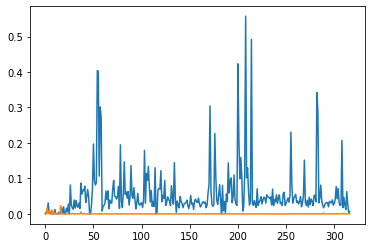

In [199]:
plt.plot(s.iloc[:, 206].sort_index().reset_index(drop = True))
plt.plot(s.iloc[:, 207].sort_index().reset_index(drop = True))
# E.iloc[:, 206]

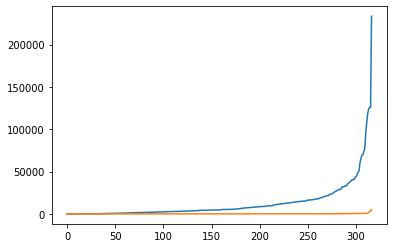

In [213]:
# E.iloc[:, 206]
plt.plot(E.iloc[:, 206].sort_values().reset_index(drop = True))
plt.plot(E.iloc[:, 207].sort_values().reset_index(drop = True))

In [211]:
E.sum(axis = 1).iloc[200: 210]

industry_code
3251     98735.900000
3252     42709.200000
3253     11602.400000
3254    194631.383333
3255     45398.400000
3256     77366.950000
3259     56583.950000
3271     24753.666667
3279     37320.583333
3313     11980.066667
dtype: float64

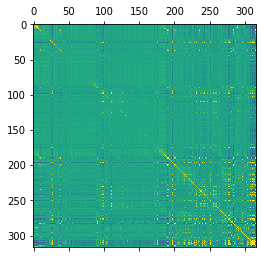

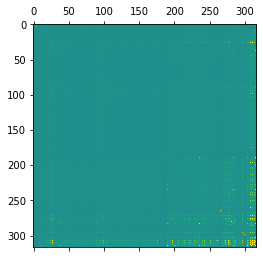

In [71]:
plt.matshow(EGnum.values, vmin = EGnum.min().min(), vmax = 0.03)
plt.matshow(C.values, vmin = -0.001, vmax = 0.001)
# (s - xr).T
# EGnum

## Model for number of workers per establishment

In [123]:
df_cnt = df_cnt.round().astype(int)
df_cnt['annual_avg_emplvl'] = df_cnt['annual_avg_emplvl']

       2
14.53 x + 16.47 x + 4.668


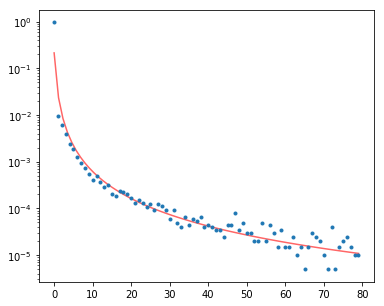

In [142]:
# 

fig, ax = plt.subplots(1, figsize = (6, 5))
S = len(df_cnt.loc[(df_cnt.annual_avg_estabs == 1)])


# df_cnt.loc[df_cnt.annual_avg_estabs == 0].annual_avg_emplvl.value_counts().sort_index().head(15).plot(marker = '.', ax = ax)
employees_hist = df_cnt.loc[(df_cnt.annual_avg_estabs == 1)].annual_avg_emplvl.value_counts()/S # Esto es PDF


series = (1/np.sqrt(employees_hist.sort_index())) # Esto va a ser una lineal que ajustamos
# series.head(35).plot(marker = '.', ax = ax)

fit_data = series.iloc[:80]
## COUNTS
x = fit_data.index.values
y = fit_data.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(p**2)

xp = np.linspace(min(x), max(x), 70)

# Invertido
ax.plot(xp, 1/p(xp)**2, '-', c = 'r', alpha = .6)
ax.plot(x, employees_hist.sort_index().iloc[:80], '.', c = '#1f77b4', zorder = 10)
plt.yscale('log')

# # Lineal
# ax.plot(xp, p(xp), '-', c = 'r', alpha = .6)
# ax.plot(x, y, '.', c = '#1f77b4', zorder = 10)

plt.show()


In [64]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.options.display.max_columns = 99

In [301]:
t = np.arange(0, 10000)
norm = 1/np.sum(1/p(t)**2
                
a = p[1]
b = p[0]

0.77918483855330956

In [312]:
# x = np.arange(0, 10000)
# y1 = (norm/p(x)**2)
# y1.cumsum()

# y2 = pd.Series(-norm/(a*(a*(x+.5) + b))) + 1

In [313]:
# La funcion -norm/(a*(a*(x+.5) + b)) + 1 parece ser una buena formula de CDF. Ahora tengo que encontrarle eg 10000 niveles

G = -norm/(a*(a*(x+.5) + b)) + 1
# plt.plot(y1.cumsum(), y2, marker = 'o')
# plt.plot(y2, y2)

In [351]:
len(synth)

50000

In [345]:
synth = np.array([norm/(a**2*(1 - c)) - b/a - 1/2 for c in np.arange(0, 1, 1/50000.)])
r2 = pd.Series(synth.round()).value_counts().sort_index()


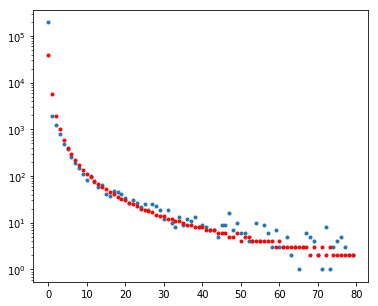

In [346]:
fig, ax = plt.subplots(1, figsize = (6, 5))

ax.plot(range(80), S*employees_hist.sort_index().iloc[:80], '.', c = '#1f77b4', zorder = 10)
ax.plot(range(80), pd.Series(synth.round()).value_counts().sort_index().iloc[:80], '.', c = 'r', zorder = 10)
plt.yscale('log')

plt.show()

In [321]:
# table = df_cnt.groupby(['annual_avg_estabs','annual_avg_emplvl']).size().unstack()
# table.iloc[:30, :30].fillna(0).astype(int)
# table.iloc[:, -30:].dropna(axis = 0,how = 'all').fillna('')

In [ ]:
# Una opcion seria tirar combinaciones hasta que alguna este por debajo del 10% de error.



In [5]:
# Choose variable
# variable = 'annual_avg_emplvl'
variable = 'annual_avg_estabs'
df_cnt = df_cnt[[variable]]

In [56]:
df_cnt

annual_avg_estabs  annual_avg_emplvl  \
area_fips industry_code                                         
1001      1114                           1                  0   
          1119                           1                  0   
          1121                           1                  0   
          1129                           1                  0   
          1132                           1                  0   
          1133                           4                  2   
          1151                           2                  0   
          1153                           1                  0   
          2123                           3                 23   
          2211                           6                 93   
          2212                           1                  0   
          2213                           3                  9   
          2361                          21                 60   
          2362                           7                 99   
          2371                           2                 10   
          2372                           1                  0   
          2373                           1                  7   
          2379                           3                 14   
          2381                          20                 85   
          2382                          26                121   
          2383                          23                108   
          2389                          12                 77   
          3116                           1                  0   
          3118                           1                  0   
          3132                           0                  0   
          3141                           0                  0   
          3149                           1                  0   
          3169                           1                  0   
          3211                           0                  0   
          3219                           1                  0   
...                                    ...                ...   
78030     7224                           8                  8   
          8111                          27                 72   
          8112                           1                  0   
          8113                          13                 18   
          8114                           9                 22   
          8121                           9                  0   
          8122                           1                  0   
          8123                          13                 80   
          8129                           7                 19   
          8131                          11                 35   
          8132                           2                  0   
          8133                           4                 26   
          8134                           2                  0   
          8139                          23                116   
          8141                          21                  9   
          9211                          11                491   
          9221                          15                931   
          9231                           6                919   
          9241                           3                 40   
          9251                           1                  0   
          9261                           9                338   
          9281                           3                 12   
78999     2379                           0                  0   
          2382                           0                  0   
          4481                           0                  0   
          5413                           0                  0   
          5613                           0                  0   
          8133                           0                  0   
          9221                           1                 4

### Population and land uses

In [61]:
# Add population
county_LU = pd.read_csv('./data/US_land_use/land_use_frac.csv', index_col=0)
county_LU.index = county_LU.index.astype(str).str.zfill(5)

In [62]:
# plt.hist(log10(county_LU['Woodland']).dropna(), 50)
# plt.show()

In [63]:
# Add population

county_pop = pd.read_csv('./data/co-est2017-alldata.csv', encoding = 'latin-1')
county_pop['area_fips'] = county_pop.STATE.astype(str).str.zfill(2) + county_pop.COUNTY.astype(str).str.zfill(3)

county_pop = county_pop[['area_fips', 'POPESTIMATE2010']].set_index('area_fips')

In [64]:
# county_ = gpd.read_file('./data/US_land_use/na70_lushp.shp')
counties = gpd.read_file('./data/cb_2017_us_county_500k/cb_2017_us_county_500k.shp')
counties['area_fips'] = counties.STATEFP + counties.COUNTYFP
counties_area = counties.set_index('area_fips')[['ALAND']]/1e6

NameError: name 'gpd' is not defined

### Industries info

In [65]:
# Drop the unclassified!
df_cnt = pd.read_csv('./data/naics_area_cnt_02_07.csv', index_col=[0, 1])
df_cnt = df_cnt.loc[~(df_cnt.index.get_level_values('industry_code') == 9999)]

# Choose variable
# variable = 'annual_avg_emplvl'
variable = 'annual_avg_estabs'
df_cnt = df_cnt[[variable]]

# X = df_stt.unstack()['annual_avg_estabs']
# X = df_msa.unstack()['annual_avg_estabs']
X = df_cnt.unstack()[variable]
X.columns = X.columns.astype(str)
X.index = X.index.astype(str).str.zfill(5)

X.shape

(3272, 317)

In [66]:
from numpy import log10

cor_mat = log10(X).corr(min_periods = 20)

def demean(Z):
    Z = Z.fillna(0)
    means = Z.mean()
    return (Z.T - means).T - means + means.mean()

def cosine_similarity(table):
#     vals = table.values
    norms = np.linalg.norm(table, axis = 0)
    norm = np.outer(norms, norms)
    result = table.T.dot(table).div(norm)
#     return pd.DataFrame(result, columns = table.columns, index = table.index)
    return result

# X_1 = demean(cor_mat)
X_1 = demean(cor_mat)
X_2 = demean(cosine_similarity(X.fillna(0)))

/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [67]:
print(X_1.stack().quantile(.1), X_1.stack().quantile(.9))

(-0.10471351784908739, 0.09643922110175343)


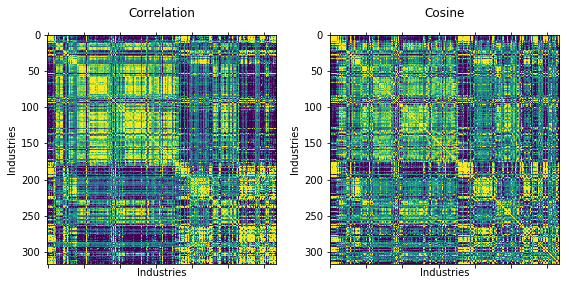

In [68]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
axs[0].set_title('Correlation')
axs[0].set_xticklabels('')
axs[0].matshow(X_1, vmin = -.1, vmax = .1);axs[0].set_xlabel('Industries'); axs[0].set_ylabel('Industries')

axs[1].set_title('Cosine')
axs[1].set_xticklabels('')
axs[1].matshow(X_2, vmin = -.1, vmax = .1); axs[1].set_xlabel('Industries'); axs[1].set_ylabel('Industries')

plt.tight_layout()
plt.show()

In [69]:
# X = pd.concat([county_pop.loc[X.index], county_LU.loc[X.index], X], axis = 1, sort = True)

# introduce wages as variable (~per cap income)

df_cnt = pd.read_csv('./data/naics_area_cnt_02_07.csv', index_col=[0, 1])
df_indu = df_cnt.groupby(level = 0).sum()
# df_indu.index = df_indu.index.astype(str)
avg_wages_city = df_indu[['total_annual_wages']].div(df_indu[['annual_avg_emplvl']].values).dropna()
# avg_wages_city = np.log10(avg_wages_city)
avg_wages_city.index = avg_wages_city.index.astype(str).str.zfill(5)


In [70]:
X_vars = pd.concat([county_pop.loc[X.index], county_LU.loc[X.index], avg_wages_city.loc[X.index], counties_area.loc[X.index]], axis = 1, sort = True).dropna()
# X_vars['pop_dens'] = np.log10(X_vars['POPESTIMATE2010'] / X_vars['ALAND'])
# X_vars['pop_dens'] = X_vars['POPESTIMATE2010'] / X_vars['ALAND']

/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


NameError: name 'counties_area' is not defined

In [71]:
# X = X.drop('ALAND', axis = 1)
X = pd.concat([X_vars, X], axis = 1, sort = True)

NameError: name 'X_vars' is not defined

In [72]:
X = X.drop(['Cropland','Desert','Grassland','Other','Urban','Water','Woodland'], axis = 1)
# X['pop_dens'] = (X['pop_dens'] > X['pop_dens'].quantile(.95)).astype(int)
# X['pop_dens'] = 1

KeyError: "['Cropland' 'Desert' 'Grassland' 'Other' 'Urban' 'Water' 'Woodland'] not found in axis"

### Covariance Matrix

In [19]:
cor_mat = log10(X).corr(min_periods = 20)
cov_mat = log10(X).cov(min_periods = 20)

./../Hidalgo_Haussmann/HH_tools.py:58: RuntimeWarning: divide by zero encountered in log10
  return np.log10(df).replace(-np.inf, np.nan)


In [20]:
def demean(Z):
    Z = Z.fillna(0)
    means = Z.mean()
    return (Z.T - means).T - means + means.mean()

def stand(Z):
    Z = Z.fillna(0)
    std = Z.std()
    return Z.T.div(std).T.div(std)

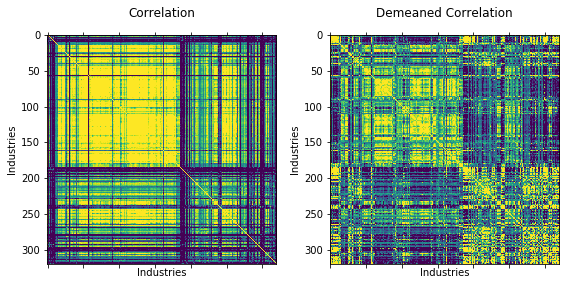

In [21]:
# mat = demean(cor_mat.fillna(0))
# mat = cor_mat
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
# fig.suptitle('Correlation Matrix')

# axs[0].matshow(demean(stand(demean(cor_mat))), vmin = -10, vmax = 10)

axs[0].set_title('Correlation')
axs[0].set_xticklabels('')
axs[0].matshow(cor_mat.fillna(0), vmin = .2, vmax = .7);axs[0].set_xlabel('Industries'); axs[0].set_ylabel('Industries')

axs[1].set_title('Demeaned Correlation')
axs[1].set_xticklabels('')
# axs[0].xaxis.set_tick_params(labelbottom='on')
axs[1].matshow(demean(cor_mat), vmin = -.1, vmax = .1); axs[1].set_xlabel('Industries'); axs[1].set_ylabel('Industries')


# plt.hist(stand(demean(cor_mat)).std(), 30)
plt.tight_layout()
plt.savefig('./../../../../media/miglesia/Elements/WRITING/paper3_writing/figures/corr_matrix_demean_ill.png')
plt.show()

In [73]:
# Try spectral clustering. Works when matrix is demeaned
from sklearn.cluster import SpectralClustering


def cosine_similarity(table):
#     vals = table.values
    norms = np.linalg.norm(table, axis = 0)
    norm = np.outer(norms, norms)
    result = table.T.dot(table).div(norm)
#     return pd.DataFrame(result, columns = table.columns, index = table.index)
    return result

X_ = demean(cor_mat)
X_ = demean(cosine_similarity(X.fillna(0)))
# X_ = demean(stand(demean(cor_mat)))

clustering = SpectralClustering(n_clusters=10,
        assign_labels="discretize", random_state=0).fit(X_.values)#,
#         random_state=0)

pd.options.display.max_rows = 500
clust_result = pd.DataFrame(clustering.labels_, index = X.columns, columns = ['cluster'])
clust_result = pd.concat([clust_result, industry_titles.set_index('industry_code')], axis = 1, sort = False).dropna().sort_values(by = ['cluster', 'industry_title'])

clust_result.index.name = 'industry_code'

NameError: name 'industry_titles' is not defined

In [23]:
def color_from_series(df, ix_col, val_col, cmap = plt.cm.coolwarm):
    import matplotlib.colors as mcolors

    # create color reference
    qlo = df[val_col].quantile(.2)
    qhi = df[val_col].quantile(.8)
    norm = mcolors.Normalize(vmin=qlo, vmax=qhi, clip=True)
    mapper = plt.cm.ScalarMappable(norm = norm, cmap=cmap)
    df['color'] = df[val_col].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x))) 
    color = df[[ix_col, 'color']]
    return color

### Wages

In [24]:
df_cnt = pd.read_csv('./data/naics_area_cnt_02_07.csv', index_col=[0, 1])
df_indu = df_cnt.groupby(level = 1).sum()
avg_wages_indu = df_indu[['total_annual_wages']].div(df_indu[['annual_avg_emplvl']].values).dropna()
avg_wages_indu = np.log10(avg_wages_indu)
avg_wages_indu = avg_wages_indu.reset_index()
avg_wages_indu['industry_code'] = avg_wages_indu['industry_code'].astype(str)

wages_color = color_from_series(avg_wages_indu, 'industry_code', 'total_annual_wages', 
                                cmap = plt.cm.RdYlGn).rename(columns = {'color': 'wage_color'})

### Sort clusters by size

In [25]:
df_indu = df_cnt.groupby(level = 1).sum()
df_indu.index = df_indu.index.astype(str)

cluster_data = pd.concat([clust_result, df_indu], axis = 1, sort = False)

cluster_data = cluster_data.groupby('cluster').agg({'industry_title': 'nunique', 'annual_avg_estabs': 'sum',
                                    'annual_avg_emplvl': 'sum', 'total_annual_wages': 'sum', })

cluster_data['avg_annual_wages'] = np.round(cluster_data.total_annual_wages / cluster_data.annual_avg_emplvl)

In [26]:
sorted_cluster_data = cluster_data.sort_values('annual_avg_estabs', ascending = False)

sorted_cluster_data.style.bar()

sorted_cluster_data = sorted_cluster_data.reset_index().reset_index()

clust_result = clust_result.reset_index().merge(sorted_cluster_data[['cluster', 'index']], how = 'left'
                                ).set_index('industry_code'
                                           ).drop('cluster', 1).rename(columns = {'index':'cluster'})

### Edges

In [27]:
edges = pd.DataFrame(demean(cor_mat).stack(), columns = ['dem_corr'])
# edges = pd.DataFrame(demean(stand(demean(cor_mat))).stack(), columns = ['dem_corr'])
# > demean(cor_mat).values, 90
# edges.loc[]
edges_s = edges.loc[edges.dem_corr > edges.dem_corr.quantile(.9)]
edges_s.index.names = ['industry_code_x', 'industry_code_y']
edges_s = edges_s.reset_index().merge(
    industry_titles, left_on = 'industry_code_x', right_on = 'industry_code').merge(
    industry_titles, left_on = 'industry_code_y', right_on = 'industry_code').T.drop_duplicates().T
edges_s['dem_corr'] = edges_s['dem_corr'].astype(float)

In [28]:
# #Load modules
# from numpy.random import choice 
# from numpy import where, power

In [29]:
import matplotlib.colors as mcolors

# nodes = industry_titles

nodes_size = pd.DataFrame(np.sqrt(X.sum()), columns=['sqrt_size'])
nodes = pd.concat([nodes_size, clust_result], axis = 1, sort = False)

norm = mcolors.Normalize(vmin=0, vmax=10, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.gist_ncar)

nodes['color'] = nodes['cluster'].apply(lambda x: mcolors.rgb2hex(mapper.to_rgba(x)))
nodes['color'] = nodes['color'].replace('#000080', '#9c28d2')

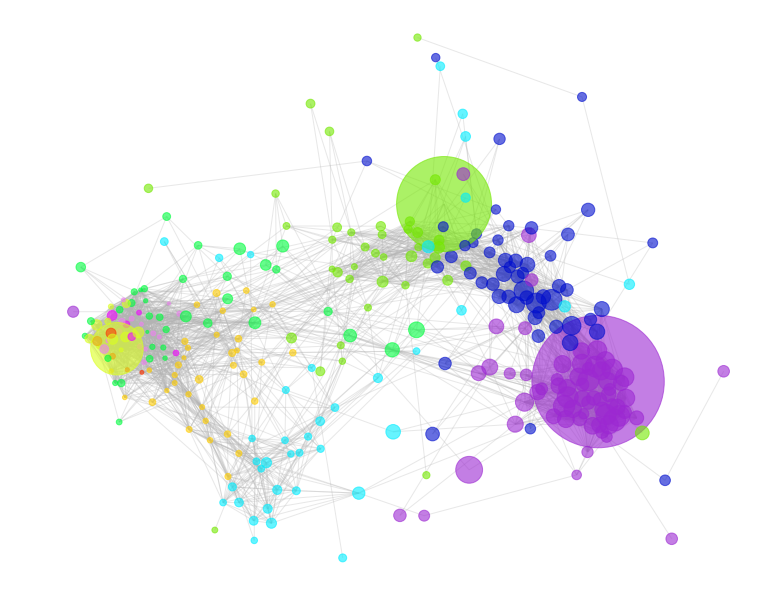

In [30]:
import json

max_d = 40
weight_column = 'dem_corr' #'weight_'+geo

        ### Max degree = max_d. Parameter used to trim the network.
df1 = edges_s.groupby('industry_code_x').apply(lambda x: x.nlargest(max_d, weight_column)).reset_index(drop = True)
df2 = edges_s.groupby('industry_code_y').apply(lambda x: x.nlargest(max_d, weight_column)).reset_index(drop = True)
edges_max_d = df1.merge(df2, on = ['industry_code_x', 'industry_title_x', 'industry_code_y', 'industry_title_x', weight_column]).reset_index(drop = True)

###

# Hard threshold and max degree backboning

G = nx.from_pandas_edgelist(edges_max_d, 'industry_code_x', 'industry_code_y', weight_column)


plt.figure(figsize = (10, 8))

G = max(nx.connected_component_subgraphs(G), key=len)
nodes_s = nodes.loc[G.nodes.keys()]

## POSITIONS

# pos = nx.spring_layout(G, k=.3)

# def default(obj):
#     if type(obj).__module__ == np.__name__:
#         if isinstance(obj, np.ndarray):
#             return obj.tolist()
#         else:
#             return obj.item()
#     raise TypeError('Unknown type:', type(obj))

# # dumped = json.dumps(data, default=default)

# f = open("./data/node_layout","w")
# f.write(json.dumps(pos, default=default))

f = open('./data/node_layout', 'r')
pos = json.loads(f.read())

nx.draw(G, pos, node_size = nodes_s.sqrt_size.values, alpha=.6, node_color= list(nodes_s.color.values), edgelist = [])
nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3)
# plt.title('max_d = '+str(max_d))
#     plt.savefig('./Figures/5_max_deg/'+col_name+'_plot1.png')
#             plt.show()

plt.show()

In [31]:
# xx

### Draw in d3plus

In [32]:
# nodes
pos_df = pd.DataFrame(pos, index = ['x', 'y']).T
nodes_wpos = pd.concat([nodes_s, pos_df], axis = 1, sort = False)

In [33]:
nodes_ = nodes_wpos.reset_index()[['index','x', 'y', 'industry_title', 'color']].dropna(subset = ['x']).rename({'index': 'id'}, axis = 1)
nodes_['id'] = nodes_['id'].astype(str).str.zfill(4)
nodes_[['x', 'y']] = 500 * nodes_[['x', 'y']]


In [34]:
nodes_s.head()

,sqrt_size,industry_title,cluster,color
1142,17.839563,NAICS 1142 Hunting and trapping,3,#00fd3f
5173,85.906732,NAICS 5173 Wired and wireless telecommunicatio...,4,#74e800
5171,129.311832,NAICS12 5171 Wired telecommunications carriers,1,#000ecd
1141,45.170603,NAICS 1141 Fishing,3,#00fd3f
3335,104.200928,NAICS 3335 Metalworking machinery manufacturing,2,#00edff


In [35]:
# nodes_.sort_values(by = 'id')#.loc[nodes_.id == 'Desert']

In [36]:
import sys
sys.path.append("./../Hidalgo_Haussmann") # for HH tools
import pandas as pd
from HH_tools import robust_proximity, year_to_tp, RCA

In [37]:
nodes_['presence'] = True

edges_max_d['edge_tuple'] = list(zip(edges_max_d.industry_code_x, edges_max_d.industry_code_y))
edges_max_d['edge_tuple_rev'] = list(zip(edges_max_d.industry_code_y, edges_max_d.industry_code_x))
edges_max_d_triangles = edges_max_d.loc[edges_max_d.edge_tuple.isin(G.edges()) | edges_max_d.edge_tuple_rev.isin(G.edges())]

links = edges_max_d_triangles.reset_index().rename({weight_column: 'strength'},axis = 1)
links['target'] = links['industry_code_y'].astype(str).str.zfill(4)
links['source'] = links['industry_code_x'].astype(str).str.zfill(4)

# links = nc_backbone.reset_index().rename({'score': 'strength'},axis = 1)
# links['target'] = links['trg'].astype(str).str.zfill(4)
# links['source'] = links['src'].astype(str).str.zfill(4)

network = '{"nodes": '+nodes_.to_json(orient= 'records')+', "edges": '+links[['index', 'source', 'target']].to_json(orient= 'records')+'}\n'
# network

In [38]:
## Conditional coloring

# Manufacturing (light_blue) and services (yellow)
nodes_['color_mfg_srv'] = 'D3D3D3' #Gray bckg

conditions = [
    (nodes_['industry_title'].str.lower().str.contains('manufacturing')) + (nodes_['industry_title'].str.lower().str.contains('mfg')),
    (nodes_['industry_title'].str.lower().str.contains('service')),# or (nodes_['industry_title'].str.lower().str.contains('mfg')),
    (nodes_['industry_title'].str.lower().str.contains('wholesale')),# or (nodes_['industry_title'].str.lower().str.contains('mfg')),
    (-nodes_['industry_title'].str.lower().str.contains('naics'))]

choices = ['#000080', '#ffc400', '#00b0ff', '#FF0000']

nodes_['color_mfg_srv'] = np.select(conditions, choices, default='#D3D3D3')


/home/miglesia/anaconda2/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [39]:
edges_max_d_triangles.to_csv('edges_max_d_triangles.csv', index = False)

In [40]:
nodes_ = nodes_.merge(wages_color, how = 'left', left_on = 'id', right_on = 'industry_code')

In [41]:
from IPython.display import HTML


In [45]:
ps = d3plus.ProductSpace(
id="name",
name="industry_title",
color="wage_color",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

name = 'wages'

visualization_html = ps.dump_html(nodes_)
# Dump it out in my_treemap.html
file_ = name + '_nwplot.html'
link = "http://matiasdice.com/other/"+file_
# display(HTML("""<a href="%s">Browse interactive network plot</a>""" % link))
open('./html/'+file_, "w+").write(visualization_html);

<IPython.core.display.Javascript object>

In [47]:
ps = d3plus.ProductSpace(
id="name",
name="industry_title",
color="color_mfg_srv",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

name = 'anchors'

visualization_html = ps.dump_html(nodes_)
# Dump it out in my_treemap.html
file_ = name + '_nwplot.html'
link = "http://matiasdice.com/other/"+file_
# display(HTML("""<a href="%s">Browse interactive network plot</a>""" % link))
open('./html/'+file_, "w+").write(visualization_html);

<IPython.core.display.Javascript object>

#### Which ones correlate most with...

In [ ]:
target = 'total_annual_wages' # POPESTIMATE2010 	total_annual_wages 	ALAND

pop_nodes = X_[[target]].sort_values(target).tail(20)

pop_nodes = pd.concat([pop_nodes, nodes[['industry_title']], df_indu], axis = 1, sort = False).dropna()

pop_nodes.sort_values(by = 'annual_avg_emplvl')

In [48]:
ps = d3plus.ProductSpace(
id="name",
name="industry_title",
color="color",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

name = 'clusters'

visualization_html = ps.dump_html(nodes_)
# Dump it out in my_treemap.html
file_ = name + '_nwplot.html'
link = "http://matiasdice.com/other/"+file_
# display(HTML("""<a href="%s">Browse interactive network plot</a>""" % link))
open('./html/'+file_, "w+").write(visualization_html);

<IPython.core.display.Javascript object>

In [ ]:
nodes.groupby('cluster').color.unique()

### Activities by cluster

In [ ]:

nodes.to_csv('./../data/naics_cluster_color.csv')

In [ ]:
# Save total establishments by spectral analysis cluster, and county:
# xx
X_area_cluster = pd.concat([nodes[['cluster']], X.T], axis = 1)
X_area_cluster = X_area_cluster.iloc[10:]
X_area_cluster = X_area_cluster.groupby('cluster').sum().T
X_area_cluster.to_csv('./data/X_county_cluster.csv')

X_area_cluster.head()

In [ ]:
# X_area_cluster.loc['46113']

In [ ]:
# X.T.iloc[10:].sum().sum()/1e6

In [ ]:
clusters = nodes.loc[nodes.industry_title.str.contains('NAICS')].reset_index().rename(columns = {'index': 'industry_code'})[['industry_code', 'industry_title', 'cluster', 'color']]
clusters.to_csv('./data/clusters.csv', index = False)

In [ ]:
pd.set_option('display.max_colwidth', -1)
summary = nodes.loc[nodes.industry_title.str.contains('NAICS')].groupby('cluster').apply(lambda x: x.sample(3))#.agg({'industry_title': 'first', 'color':[ 'first', 'count']})
# summary.columns = ['color', 'node_count','example']
summary.sort_index()#.sort_values(by = 'node_count')

In [ ]:
nodes_['color'].value_counts().index

In [ ]:
# land-use clusters
nodes_.loc[nodes_['color'].isin(['#f10800', '#ff6800', '#ceff29', '#29ffce'])].sort_values(by = ['color','industry_title'])

#population cluster
nodes_.loc[nodes_['color'].isin(['#7dff7a'])].sort_values(by = ['color','industry_title'])

#'yellow' services cluster
nodes_.loc[nodes_['color'].isin(['#ffc400'])].sort_values(by = ['color','industry_title'])

#state/public sector cluster
# nodes_.loc[nodes_['color'].isin(['#004cff'])].sort_values(by = ['color','industry_title'])

#others/mfg clusters
# nodes_.loc[nodes_['color'].isin(['#000080', '#0000f1', '#00b0ff'])].sort_values(by = ['industry_title'])

# coastal?
# nodes_.loc[nodes_['color'].isin(['#0000f1'])].sort_values(by = ['color','industry_title'])

### Keywords by cluster

In [ ]:
# Cluster 7, #ffc400 are 76 nodes that follow neither population nor land resources. Then what is it all about?
from collections import Counter
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 

from IPython.display import display, HTML
import colorlover as cl    
    
for clsr in range(10):
    try:
        
        text = nodes.loc[nodes.cluster == clsr]['industry_title']

        r1 = text.str.lower().str.split().values
        r1 = [item for sublist in r1 for item in sublist]

        r1_f = [w.replace(',', '').replace('mfg.', 'manufacturing') for w in r1 if not w in stop_words] 

#         print(summary.loc[clsr])
        color = summary.loc[clsr]['color']
#         display(HTML(cl.to_html( [tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))] )))
        print(Counter(r1_f).most_common()[:10])
        print('\n')
    except:
        pass

In [ ]:
display(HTML(cl.to_html( [tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))] )))


### Map distribution from different clusters

In [ ]:
# nodes
import geopandas as gpd

counties = gpd.read_file('./data/cb_2017_us_county_500k/cb_2017_us_county_500k.shp')
counties['area_fips'] = counties.STATEFP + counties.COUNTYFP


In [ ]:
### A little trick. Distribution of neigbors of node 'Naics 5417 Scientific Research and Development Services'
# nodes_.loc[nodes_.id == '5417']
ego_node = 'Desert' #'Cropland' #'POPESTIMATE2010'# '5417'

neigh = edges_max_d_triangles.loc[(edges_max_d_triangles.industry_code_x == ego_node) |
                                  (edges_max_d_triangles.industry_code_y == ego_node)]
neigh_ids = list(set(neigh['industry_code_x'].unique()).union(set(neigh['industry_code_y'].unique())))
# nodes_.loc[nodes_.id.isin(neigh_ids)]['id'].values

node_ids = neigh_ids

In [ ]:
# gdf.loc[gdf.industry_code == naics]['annual_avg_estabs']
# df_neigh
# df_neigh.groupby('industry_code').mean().sort_values(by = 'annual_avg_estabs').tail(5).index

In [ ]:
from PIL import Image, ImageDraw, ImageFont


In [ ]:
# Choose indus to process...
n = 5
merged = df_agglv_yravg.groupby(level = 1)[variable].sum().reset_index().merge(nodes_, left_on = 'industry_code', right_on = 'id')
display_indus = merged.loc[merged.groupby('color')[variable].nlargest(n).index.get_level_values(1)]

#Filter original data to have these neighboring industries
df_agglv = df.loc[df.agglvl_code == 76]

df_agglv_yravg = df_agglv.groupby(['area_fips', 'industry_code']).mean().drop(['agglvl_code','year'], axis = 1)
# df_indu_prc_area = df_agglv_yravg.groupby(level=0).apply(lambda x: 100 * x / x.sum())
df_indu_prc_area = log10(df_agglv_yravg)

df_ = df_indu_prc_area.reset_index()

i = 0
open('./Figures/7_compo_USA_nw/labels.txt', 'w').close()
for color in nodes_.color.unique():
  
    cluster_ids = nodes_.loc[nodes_.color == color]['id']
    node_ids = cluster_ids.values
    
    df_neigh = df_.loc[df_.industry_code.isin(nodes_.loc[nodes_.id.isin(node_ids)]['id'].values)]
    df_neigh = df_neigh.set_index('area_fips')
    
    counties_ = counties.set_index('area_fips').reindex(df_neigh.index)[['geometry']]
    gdf = gpd.GeoDataFrame(pd.concat([df_neigh, counties_], axis = 1, sort = True).dropna())

    # Sample of cluster color
    rgb_tuple = tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))
    im = Image.new('RGBA', (20, 20), rgb_tuple)
    im.save('./Figures/7_compo_USA_nw/cp_'+str(i)+'.png')

    for naics in display_indus['industry_code'].values:
        if( gdf.loc[gdf.industry_code == naics]['annual_avg_estabs'].mean() > .2 ):#& (i <=5): # Dismiss small indus
            node_info = nodes_.loc[nodes_.id == naics]
            
            # send node labels to test (they will then go to svg of figure)
            with open('./Figures/7_compo_USA_nw/labels.txt', 'a') as f:
                f.write(node_info['industry_title'].values[0]+'\n')
            display(node_info)
            display(HTML(cl.to_html( [rgb_tuple] )))

            ax = gdf.loc[gdf.industry_code == naics].plot(
                column='annual_avg_estabs', cmap=plt.cm.gist_yarg, vmin = 0, vmax = 1.5, linewidth = 0, figsize = (10, 6.5))
            ax.set_xlim(-130, -60)
            ax.set_ylim(22, 50)#, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
#             plt.axis('off')
            ax.get_xaxis().set_ticks([])
            ax.get_yaxis().set_ticks([])
            plt.text(-128, 23.5, 'NAICS '+str(node_info['id'].values[0]), fontsize=30) # position in lat lon
            plt.savefig('./Figures/7_compo_USA_nw/'+str(node_info['id'].values[0])+'.png', bbox_inches = 'tight')
            plt.show()
    i+=1

In [ ]:
# TXT2InkscapeXMLv3.py

# A simple Python 3 script to look through a list of text and
# turn each line into an xml entry for use in Inkscape.
# in this script we will slightly spread the text to allow
# the user a better chance of retaining the order of their
# initial text.  Inkscape can be used to spread it out
# using the Align and Distribute Tool.


ofilenm = './Figures/7_compo_USA_nw/figure.svg'#str(input("What is the filename you wish for output?"))
outfile = open(ofilenm,"w")

ListFlm = './Figures/7_compo_USA_nw/labels.txt'#str(input("What is the name and location of the TXT file to work with?"))

Loctn = 75 #Vertical position to start text insertion
SpacingV = 25  #The vertical spacing between lines.

# The block that follows is the Inkscape standard header.
TextBlockA = '''<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="744.09448819"
   height="1052.3622047"
   id="svg2"
   version="1.1"
   inkscape:version="0.48.4 r9939"
   sodipodi:docname="New document 1">
  <defs
     id="defs4" />
  <sodipodi:namedview
     id="base"
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1.0"
     inkscape:pageopacity="0.0"
     inkscape:pageshadow="2"
     inkscape:zoom="0.35"
     inkscape:cx="375"
     inkscape:cy="520"
     inkscape:document-units="px"
     inkscape:current-layer="layer1"
     showgrid="false"
     inkscape:window-width="1280"
     inkscape:window-height="742"
     inkscape:window-x="-2"
     inkscape:window-y="-3"
     inkscape:window-maximized="1" />
  <metadata
     id="metadata7">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     inkscape:label="Layer 1"
     inkscape:groupmode="layer"
     id="layer1">'''

TextBlockB = '''<text\n
        xml:space="preserve"
        style="font-size:20px;font-style:normal;font-weight:normal;line-height:125%;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;font-family:Sans"
        x="93.910118"
        y="'''
TextBlockC = '''id="text2989"
        sodipodi:linespacing="150%"><tspan
            sodipodi:role="line"
            id="tspan2991"
            x="93.910118"
            y="'''

outfile.write(TextBlockA)

# The section that follows is to build the SVG text elements
f = open(ListFlm,"r")
for line in f:
    TXTLine = line.strip()
    Loctn = Loctn + SpacingV
    InsertStrng1 = str(Loctn)+'"\n'
    InsertStrng2= str(Loctn)+'">'+TXTLine+'</tspan></text>\n'
    outfile.write(TextBlockB)
    outfile.write(InsertStrng1)
    outfile.write(TextBlockC)
    outfile.write(InsertStrng2)

# The next section is the close off for the SVG xml.

outfile.write('  </g>\n')
outfile.write('</svg>\n')

outfile.close()
print("Done")

In [ ]:
# Choose indus to process...
n = 5
merged = df_agglv_yravg.groupby(level = 1)['annual_avg_estabs'].sum().reset_index().merge(nodes_, left_on = 'industry_code', right_on = 'id')
display_indus = merged.loc[merged.groupby('color')['annual_avg_estabs'].nlargest(n).index.get_level_values(1)]

#Filter original data to have these neighboring industries
df_agglv = df.loc[df.agglvl_code == 76]

df_agglv_yravg = df_agglv.groupby(['area_fips', 'industry_code']).mean().drop(['agglvl_code','year'], axis = 1)
# df_indu_prc_area = df_agglv_yravg.groupby(level=0).apply(lambda x: 100 * x / x.sum())
df_indu_prc_area = log10(df_agglv_yravg)

df_ = df_indu_prc_area.reset_index()

for color in nodes_.color.unique():
  
    cluster_ids = nodes_.loc[nodes_.color == color]['id']
    node_ids = cluster_ids.values
    
    df_neigh = df_.loc[df_.industry_code.isin(nodes_.loc[nodes_.id.isin(node_ids)]['id'].values)]
    df_neigh = df_neigh.set_index('area_fips')
    
    counties_ = counties.set_index('area_fips').reindex(df_neigh.index)[['geometry']]
    gdf = gpd.GeoDataFrame(pd.concat([df_neigh, counties_], axis = 1, sort = True).dropna())
    
    for naics in display_indus['industry_code'].values:
        if( gdf.loc[gdf.industry_code == naics]['annual_avg_estabs'].mean() > .45 ):#& (i <=5): # Dismiss small indus
            display(nodes_.loc[nodes_.id == naics])
            display(HTML(cl.to_html( [tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))] )))

            ax = gdf.loc[gdf.industry_code == naics].plot(
                column='annual_avg_estabs', cmap=plt.cm.gist_yarg, vmin = 0, vmax = 1.5, linewidth = 0, figsize = (10, 6.5))
            ax.set_xlim(-130, -60)
            ax.set_ylim(22, 50)#, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
            plt.show()
            i+=1

### Color by Population Density

In [ ]:
processed_data_path = './../../../../../media/miglesia/Elements/corr_st_data/'

main_tables = pd.concat([pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2011_2012.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2011_2013.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2012_2013.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2014_2011.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2014_2012.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2014_2013.csv')])

main_table = main_tables.groupby('CHI ID COM').mean()/2.

# change node names into node index
# main_table.rename(columns = dict(zip(nodes.node_name, nodes.index)), inplace = True)

population = pd.read_csv('./data/pop_dist_comuna.csv').rename(columns = {'comuna_id': 'CHI ID COM'})

In [ ]:
from numpy import log10
population['log_dens'] = log10(population['densidad'])
b = 8; population['log_dens_cat'] = pd.cut(population['log_dens'], b)

bins = pd.cut(population['log_dens'], b, retbins=True)[1]
bins_mean = (bins[1:] + bins[:-1])/2.

merged = pd.concat([population.set_index('CHI ID COM')[['log_dens_cat']].sort_index(), main_table], axis = 1)
popdens_RCA = RCA(merged.groupby('log_dens_cat').sum())

popdens_RCA_normed = popdens_RCA/popdens_RCA.sum()

In [ ]:
nodes_

In [ ]:
# pop_dens_index = pd.DataFrame((popdens_RCA_normed.T*bins_mean).T.sum(), columns = ['pop_dens_index'])
# pop_dens_index = pop_dens_index.reset_index().rename(columns={'index':'id'})
# nodes_ = nodes_.merge(pop_dens_index, on = 'id', how = 'left') # industry_title / node_name
# # nodes_['pop_dens_color_code'] = pd.cut(nodes_['pop_dens_index'], bins = 7, labels=False)

# from numpy import nan
# rainbow_colors = {0:'#9400D3', #Violet
# 1:'#4B0082', #Indigo
# 2:'#0000FF', #Blue
# 3:'#00FF00', #Green
# nan:'#D3D3D3',  #'#D3D3D3', #Gray
# 4:'#FFFF00', #Yellow
# 5:'#FF7F00', #Orange
# 6:'#FF0000'} #Red

# nodes_['color_2'] = pd.DataFrame(nodes_['pop_dens_color_code'].map(rainbow_colors))

# network = '{"nodes": '+nodes_.to_json(orient= 'records')+', "edges": '+links[['index', 'source', 'target']].to_json(orient= 'records')+'}\n'

In [ ]:
ps = d3plus.ProductSpace(
id="name",
name="node_name",
color="color_2",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

In [ ]:
plt.hist(edges.weight_CHI_COM.values, 50)
plt.hist(edges_max_d.weight_CHI_COM.values, 50)
plt.show()